 ## Cooling simulation: CO₂ cooling a stainless steel pump
 This script simulates the cooling of a 7.5 kg stainless steel pump from 25°C to -25°C using CO₂ at -32°C.
 It uses `CoolProp` to get temperature-dependent heat capacity for CO₂, with perfect heat exchange and no losses.

 ### Install CoolProp if needed
 Uncomment and run this if CoolProp isn't installed

In [ ]:
# !pip install CoolProp

In [ ]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt

 ### Input parameters

In [ ]:
# Pump properties
mass_pump = 7.5  # kg
c_pump = 500     # J/kg·K (typical for stainless steel)
T_init = 25 + 273.15       # K
T_target = -25 + 273.15    # K
T_approach = 5 #min difference between CO2 and pump temperature

# CO₂ properties
mass_flow_CO2 = 60 / 3600  # kg/s (60 kg/h)
T_CO2_in = -32 + 273.15    # K
fluid = 'CO2'

# Simulation settings
time_step = 1      # sec
max_time = 3600    # sec

 ### Initialize state variables

In [ ]:
T_pump = T_init
time = 0

time_log = []
temp_log = []

 ### Run the time-stepping simulation

In [ ]:
while T_pump > T_target and time < max_time:
    T_CO2_avg = (T_CO2_in + T_pump) / 2
    c_CO2 = CP.PropsSI('C', 'T', T_CO2_avg, 'P', 1e5, fluid)  # J/kg·K at 1 atm
    
    T_CO2_out = T_pump - T_approach  # CO₂ can only reach this temp
    delta_T_CO2 = T_CO2_out - T_CO2_in
    Q_CO2 = mass_flow_CO2 * c_CO2 * delta_T_CO2 * time_step  # J

    delta_T_pump = Q_CO2 / (mass_pump * c_pump)
    T_pump -= delta_T_pump

    time += time_step
    time_log.append(time)
    temp_log.append(T_pump - 273.15)

 ### Plot the results

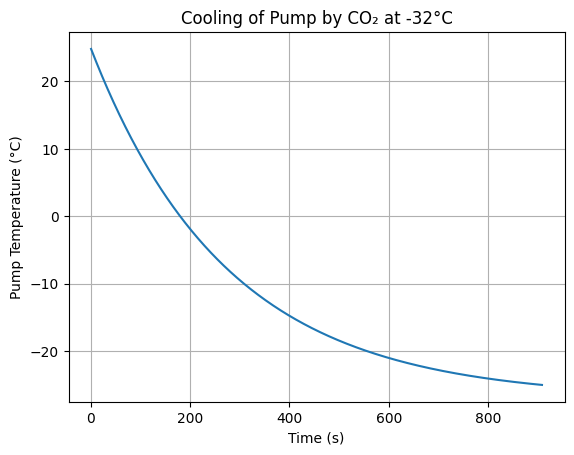

In [ ]:
plt.plot(time_log, temp_log)
plt.xlabel("Time (s)")
plt.ylabel("Pump Temperature (°C)")
plt.title("Cooling of Pump by CO₂ at -32°C")
plt.grid(True)
plt.show()

 ### Final output

In [ ]:
print(f"Final temperature: {T_pump - 273.15:.2f} °C after {time/60:.1f} minuteseconds")

Final temperature: -25.00 °C after 15.1 minuteseconds


No kernel connected